In [1]:
import geopandas as gpd
import os
import pandas as pd
import numpy as np
from shapely import wkt
import matplotlib.pyplot as plt
import tqdm
import json

In [2]:
# 879 MV trafos
gdf_shape = gpd.read_file('MV_trafos_voronoi_new.geojson')
gdf_shape['trafo_location'] = gdf_shape['trafo_location'].apply(wkt.loads)
gdf_shape['trafo_location'] = gpd.GeoSeries(gdf_shape['trafo_location'], crs='EPSG:2056')

In [3]:
messen_geo = gpd.read_file('municipality_boundary.geojson')

In [4]:
messen_geo

,NAME,KANTON,geometry
0,Aeugst am Albis,ZH,MULTIPOLYGON Z (((2680604.962 1236344.185 720....
1,Affoltern am Albis,ZH,MULTIPOLYGON Z (((2673825.715 1238537.954 463....
2,Bonstetten,ZH,MULTIPOLYGON Z (((2675810.595 1241034.379 579....
3,Hausen am Albis,ZH,MULTIPOLYGON Z (((2686028.446 1230192.476 545....
4,Hedingen,ZH,MULTIPOLYGON Z (((2675425.18 1240959.266 609.1...
...,...,...,...
2146,Vendlincourt,JU,MULTIPOLYGON Z (((2578418.988 1254308.346 475....
2147,Basse-Allaine,JU,MULTIPOLYGON Z (((2569733.011 1260828.941 497....
2148,Clos du Doubs,JU,MULTIPOLYGON Z (((2581281.96 1244204.79 792.55...
2149,Haute-Ajoie,JU,MULTIPOLYGON Z (((2563679.121 1250609.224 569....


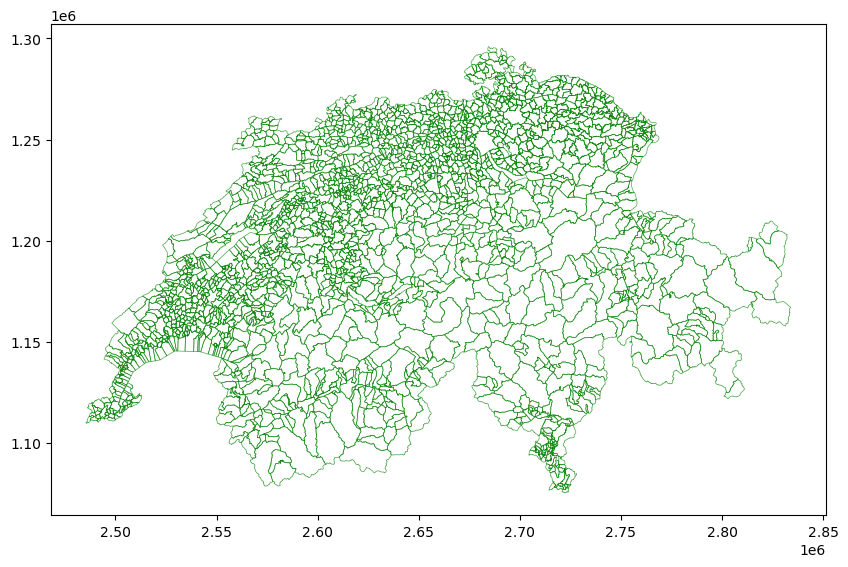

In [5]:
ax = messen_geo.plot(color='none', edgecolor='green', linewidth=0.5, alpha=0.7,figsize=(10, 8))

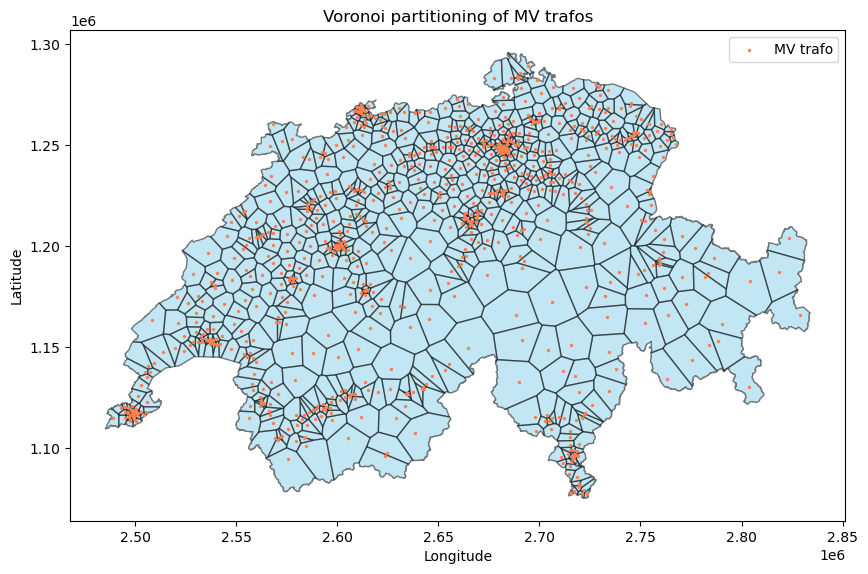

In [6]:
ax = gdf_shape['geometry'].plot(color='skyblue', edgecolor='black', alpha=0.5, figsize=(10, 8),aspect='equal')
gdf_shape['trafo_location'].plot(ax=ax, color='coral', marker='o', markersize=2, label = 'MV trafo')
#messen_geo.plot(ax=ax, color='none', edgecolor='green', linewidth=0.5, alpha=0.7)
plt.title('Voronoi partitioning of MV trafos')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

load EV data

In [7]:
base_path = os.getcwd()
profile_path = os.path.join(base_path, 'profiles')
# CP_y4.csv: hourly charging load, in kW
#FE_ y4.csv: daily flexible energy, in KWh
#PD_ y4.csv: hourly upper power bound, in kW
#PU_y4.csv: hourly lower power bound, in kW
CP = pd.read_csv(os.path.join(profile_path, 'CP_y4.csv'), header=None)
FE = pd.read_csv(os.path.join(profile_path, 'FE_y4.csv'), header=None)
PD = pd.read_csv(os.path.join(profile_path, 'PD_y4.csv'), header=None)
PU = pd.read_csv(os.path.join(profile_path, 'PU_y4.csv'), header=None)

In [8]:
FE.head(5)

,0,1,2,3,4,5,6,7,8,9,...,356,357,358,359,360,361,362,363,364,365
0,Messen,3075.936446,3422.275683,5119.005556,5963.806944,5862.966111,6201.075278,4726.758889,3075.936446,3422.275683,...,6321.132222,4434.957222,3199.649474,3211.529958,5646.201667,6062.818056,6175.097778,6321.132222,4434.957222,3199.649474
1,Wynau,2700.894317,3324.813182,4206.548889,4859.189444,5641.818056,5746.031111,4397.640833,2700.894317,3324.813182,...,5113.843889,4381.378056,2724.522189,3007.388109,4557.878889,5446.619722,5731.511944,5113.843889,4381.378056,2724.522189
2,Alpnach,17630.166243,15918.542744,23708.403056,23433.184167,22647.721111,21960.205000,21385.362500,17630.166243,15918.542744,...,21923.252778,20985.457222,16366.324248,16498.328114,23119.310278,23218.343333,22894.763056,21923.252778,20985.457222,16366.324248
3,Sarnen,29974.730083,27607.132820,40686.393889,41717.816111,40321.641111,42387.682500,38645.288333,29974.730083,27607.132820,...,40647.052222,39055.462778,30135.923721,28351.597226,41795.633889,42055.471111,39797.464722,40647.052222,39055.462778,30135.923721
4,St. Moritz,7490.625735,6119.972934,14416.443333,16076.065556,16335.978889,16544.820833,14822.321667,7490.625735,6119.972934,...,17054.911944,14135.437778,7103.566977,6280.066555,14747.203889,16310.248611,16336.186667,17054.911944,14135.437778,7103.566977


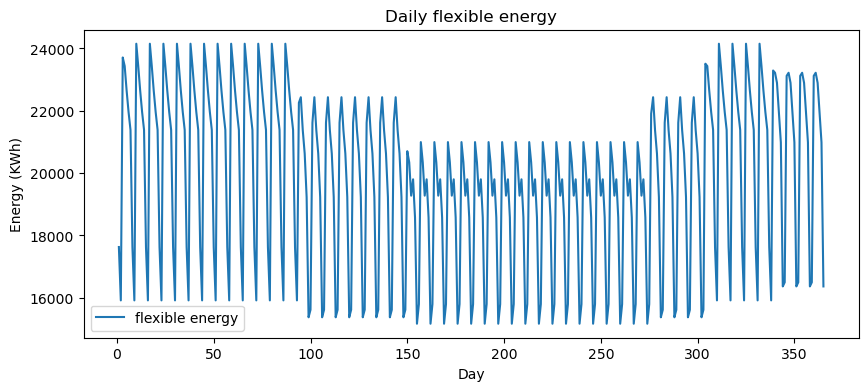

In [9]:
row = 2
plt.figure(figsize=(10, 4))
x=range(1, 366)
plt.plot(x, FE.iloc[row, 1:], label='flexible energy')
plt.xlabel('Day')
plt.ylabel('Energy (KWh)')
plt.title('Daily flexible energy')
plt.legend()
plt.show()

In [10]:
sum =0
for i in range(1,25):
    sum = sum+CP.iloc[0,i]-PD.iloc[0,i]   

column name? 
upper and lower bound?
what is daily flexible energy?

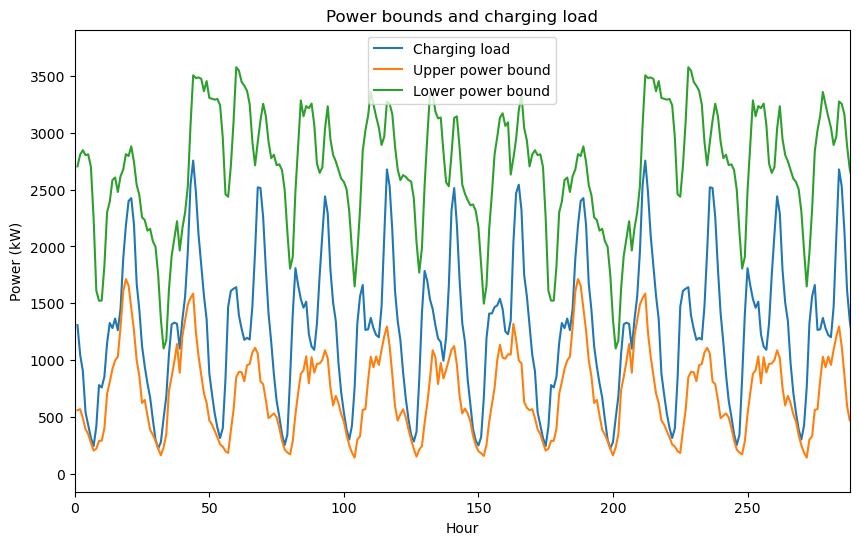

In [11]:
municipality = 2
plt.figure(figsize=(10, 6))
x = np.arange(1, 8761)
plt.plot(x, CP.iloc[municipality,1:], label='Charging load')
plt.plot(x, PD.iloc[municipality,1:], label='Upper power bound')
plt.plot(x, PU.iloc[municipality,1:], label='Lower power bound')
plt.xlabel('Hour')
plt.ylabel('Power (kW)')
plt.title('Power bounds and charging load')
plt.xlim(0, 288)
plt.legend()
plt.show()

In [41]:
script_path = os.getcwd()
LV_data_path = os.path.join(script_path, 'LV/')
dict_path = os.path.join(script_path, 'data_processing/')

with open(os.path.join(dict_path, 'dict_folder.json')) as f:
    dict_folder = json.load(f)

### functions
def concat_all_grids(grid_ids, grids_name):
    node_total = pd.DataFrame()
    print("Concatenating all the nodes and edges of the grids...")
    for n in tqdm.tqdm(range(len(grid_ids))):
        i = grid_ids[n]
        node_id = i+"_nodes"
        node = gpd.read_file(LV_data_path+dict_folder[grids_name]+'/'+node_id)
        dmd = node['el_dmd']
        grid_name = i
        node_name = node['osmid']
        node_total = pd.concat([node_total, pd.DataFrame({'grid_name':grid_name, 'node_name':node_name, 'dmd':dmd})], ignore_index=True)
    return node_total


### main
len_dict = len(dict_folder)
keys = list(dict_folder.keys())
for key in keys[0:1]:
    print("Processing grid "+key+" ("+str(list(dict_folder.keys()).index(key)+1)+"/"+str(len_dict)+")")
    path = LV_data_path+dict_folder[key]+'/'
    grid_ids = list(set([str(f.split('.')[0][:-6]) for f in os.listdir(path) if f.startswith(key+'-')]))
    node_total = concat_all_grids(grid_ids, key)

Processing grid 1 (1/2148)
Concatenating all the nodes and edges of the grids...


100%|██████████| 5/5 [00:00<00:00, 68.77it/s]


In [42]:
dict_file_path = os.path.join(dict_path, 'dict_folder.json')
print("Dict File Path:", dict_file_path)
print("File Exists:", os.path.isfile(dict_file_path))

Dict File Path: c:\Users\aalfredo\OneDrive - ETH Zurich\Documents\SwissPDGs-TimeSeries\data_processing/dict_folder.json
File Exists: True


In [44]:
table_municipality = pd.read_csv(os.path.join(dict_path, 'table_grid_municipality_LV.csv'))

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\aalfredo\\OneDrive - ETH Zurich\\Documents\\SwissPDGs-TimeSeries\\data_processing/table_grid_municipality_LV.csv'

In [ ]:
table_new = pd.DataFrame({
    'grid': table_municipality['grid_id'].str.split('-').str[0],
    'municipality': table_municipality['region_name']
}).drop_duplicates()


In [ ]:
table_new.to_csv(dict_path+'dict_grid_municipality.csv', index=False)

In [ ]:
key = 1001
municipality_names = table_new
municipality_name = municipality_names[municipality_names['grid']==str(key)]['municipality']

In [ ]:
municipality_names.dtypes

grid            object
municipality    object
dtype: object

In [ ]:
table_new

,grid,municipality
0,1,Aeugst am Albis
5,10,Obfelden
16,100,Stadel
23,1001,Doppleschwand
28,1002,Entlebuch
...,...,...
34896,990,Walliswil bei Niederbipp
34898,991,Walliswil bei Wangen
34901,992,Wangen an der Aare
34922,993,Wangenried
